In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 

In [350]:
# fonctions génériques pour manipuler la DB

def load_db():
    df = pd.read_csv("dataset_house_apartment.csv")
    df = pre_clean(df)
    df = clean_data_type(df)
    df = add_columns(df)
    return df

def clean_all(df):
    df = clean_value(df)
    df = clean_extreme_value(df)
    df = clean_remove(df)
    df = clean_missing(df)
    
    return df

    """ Pour l'optention de la db la plus propre, ces données sont manquantes mais pas vitale"""

def clean_missing(df):
    
    print("")
    print("On retire les maisons qui n'ont pas de façade : 13650")
    df = df[df.number_of_facades != 0]
    print("")
    print("On retire les maisons qui ont un jardin mais pas de superficie de jardin : 6642")
    df = df[(df.garden == 0) | ((df.garden == 1) & (df.garden_area != 0))]    
    print("")
    print("On retire les maisons qui ont une terrace mais pas de superficie de terrace : 11831")    
    df = df[(df.terrace == 0) | ((df.terrace == 1) & (df.terrace_area != 0))] 
    
    return df

def clean_value(df):
    print("")
    print("on remplace to be done up et to restore en to renovate pour uniformiser les données")
    df = df.replace("to be done up", "to renovate")
    df = df.replace("to restore", "to renovate")
    
    
    return df

def clean_extreme_value(df, colonne = ['number_of_rooms', 
                                       'house_area', 
                                       "terrace_area", 
                                       "garden_area"]):

    # on retire les valeurs extrémes en fonction d'une collone
    print("")
    print("on retire les valeurs extrèmes")
        
    for i in colonne:
        threshold = 4
        mean_y = np.mean(df[i])
        stdev_y = np.std(df[i])
        z_scores = [(y - mean_y) / stdev_y for y in df[i]]
        df = df.drop(df.index[np.where(np.abs(z_scores) > threshold)])

    return df


def clean_remove(df):
    
    # valeur manquante qui sont très importantes et compromettent l'intégrité du data set
    
    """ Valeur à mon sens inutile, il n'y a pas de correlation entre 
        surface de la maison + surface du jardin + surface de la terrace
        et surface_of_the_land
        Il y a de plus des valeurs assez extrémes et régulièrement manquantes"""
    
    print("")
    print("on supprime la collone surface of the land")
    df = df.drop(["surface_of_the_land"], axis=1)

    """ Nous retirons les maisons qui vallent moins que 50 000€.
        Il y en a 388"""
    print("")
    print("on supprime les maisons qui countent moins que 50 000€ : 388")    
    df = df[df["price"] > 50000]
    
    """ Nous retirons les maisons sans superficie.
        Il y en a 8632 """
    print("")
    print("on supprime les maisons qui countent moins que 50 000€ : 8632") 
    df = df[(df.house_area != 0)]

    
    return df

"""
Cleaning that don't remove row

"""

def clean_data_type(df):
    print("")
    print("string value changed to numeric")
    df['garden_area'] = pd.to_numeric(df['garden_area'])
    df['house_area'] = pd.to_numeric(df['house_area'])
    df['terrace_area'] = pd.to_numeric(df['terrace_area'])
    df['construction_year'] = pd.to_numeric(df['construction_year'])
    df['number_of_facades'] = pd.to_numeric(df['number_of_facades'])
    df['price'] = pd.to_numeric(df['price'])

    return df

def pre_clean(df):
    
    print("useless row deleted")
    
    df = df.drop(["furnished"], axis=1)
    df = df.drop(["surface_of_the_plot_of_land"], axis=1)
    df = df.drop(["type_of_sale"], axis=1)

    print("None and Nan replaced by 0")
    
    df = df.fillna("None")
    df = df.replace("None", 0)
    
    print("changed string for \"no price\" value to 0")
    df = df.replace("no price", 0)

    return df

""" 
change data_type to corelate, n'est pas repris ailleurs


"""

def clean_correlation(df):
    
    df['type_of_property'] = df['type_of_property'].astype('category').cat.codes
    df['subtype_of_property'] = df['subtype_of_property'].astype('category').cat.codes
    df['state_of_the_building'] = df['state_of_the_building'].astype('category').cat.codes
    df['province'] = df['province'].astype('category').cat.codes
    df['region'] = df['region'].astype('category').cat.codes

    
    return df


In [343]:
def add_columns(df):
    df['province'] = df['locality'].apply(get_province)
    df["region"] = df['province'].apply(get_region)
    
    return df
def get_province(locality):
    if locality < 1300:
        return "Bruxelles"
    elif locality < 1500:
        return "Brabant Wallon"
    elif locality < 2000:
        return "Brabant Flamand"
    elif locality < 3000:
        return "Anvers"
    elif locality < 3500:
        return "Brabant Flamand"
    elif locality < 4000:
        return "Limbourg"
    elif locality < 5000:
        return "Liege"
    elif locality < 6000:
        return "Namur"
    elif locality < 6600:
        return "Hainaut"
    elif locality < 7000:
        return "Luxembourg"
    elif locality < 8000:
        return "Hainaut"
    elif locality < 9000:
        return "Flandre-Occidentale"
    elif locality < 10000:
        return "Flandre-Orientale"
    
def get_region(province):
    if province == "Bruxelles":
        return "Region de Bruxelles-capitale"
    elif province in ["Brabant Wallon", "Liege", "Namur", "Hainaut", "Luxembourg"]:
        return "Region Wallonne"
    else:
        return "Region Flamande"


In [469]:
df = load_db()
df = clean_all(df)

useless row deleted
None and Nan replaced by 0
changed string for "no price" value to 0

string value changed to numeric

on remplace to be done up et to restore en to renovate pour uniformiser les données

on retire les valeurs extrèmes

on supprime la collone surface of the land

on supprime les maisons qui countent moins que 50 000€ : 388

on supprime les maisons qui countent moins que 50 000€ : 8632

On retire les maisons qui n'ont pas de façade : 13650

On retire les maisons qui ont un jardin mais pas de superficie de jardin : 6642

On retire les maisons qui ont une terrace mais pas de superficie de terrace : 11831


In [393]:
def heatmap(df, z = None):
    
    if z == None:
        y = 0

        for x in list(df.corr()):
            print(x)
            z = []
            for i in (-df.corr().values[y]).argsort()[:6]:

                #print(list(df.corr())[i])
                #print(df.corr().values[y][i])
                z.append(list(df.corr())[i])
            y += 1

            da = df[[z[0], z[1], z[2], z[3], z[4]]]

            plt.figure(figsize=(8,8))

            seaborn.heatmap(da.corr(), annot=True, cmap="coolwarm")
    else:
        y = 0

        for x in list(df.corr()):
            y += 1
            if x == z:
                break

        z = []
        for i in (-df.corr().values[y-1]).argsort()[:6]:

            #print(list(df.corr())[i])
            #print(df.corr().values[y][i])
            z.append(list(df.corr())[i])

        da = df[[z[0], z[1], z[2], z[3], z[4], z[5]]]

        plt.figure(figsize=(8,8))

        seaborn.heatmap(da.corr(), annot=True, cmap="coolwarm")   



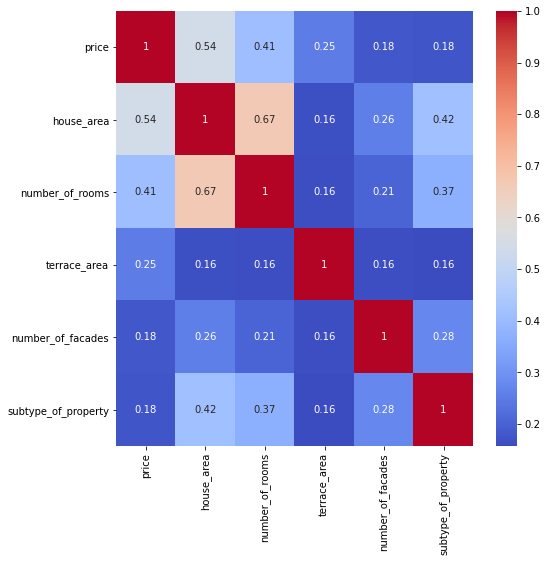

In [396]:
df = clean_correlation(df)
heatmap(df,"price")

In [473]:
df[df['subtype_of_property'].
        map(df[df["type_of_property"] == "apartment"]['subtype_of_property'].value_counts()) == 21].apply("test")

"""df[df['subtype_of_property']] = "test"
"""


AttributeError: 'DataFrame' object has no attribute 'test'

In [453]:
df[df.type_of_property == "apartment"]["subtype_of_property"].value_counts()
#df.loc[df['surface_of_the_land'] != df['house_area'] + df['terrace_area'] + df['garden_area']]

apartment       7713
duplex           723
ground floor     546
penthouse        397
flat studio      385
loft             109
service flat      93
triplex           47
Name: subtype_of_property, dtype: int64

In [454]:
i = df[df.type_of_property == "apartment"]["subtype_of_property"].value_counts()[4:100]

print("ola")
print(i)

for c in i:
    print(c)

ola
flat studio     385
loft            109
service flat     93
triplex          47
Name: subtype_of_property, dtype: int64
385
109
93
47


In [402]:
df[df.type_of_property != "apartment"]["subtype_of_property"].value_counts()


house                   9046
villa                    982
apartment block          537
mixed use building       475
town house               239
mansion                  220
exceptional property     163
country cottage          107
bungalow                  99
chalet                    62
farmhouse                 45
manor house               42
other property            40
castle                     3
Name: subtype_of_property, dtype: int64

In [ ]:
df.loc[df['surface_of_the_land'] != df['house_area'] + df['terrace_area'] + df['garden_area']]

In [88]:
list(df.columns) 


['locality',
 'type_of_property',
 'subtype_of_property',
 'price',
 'number_of_rooms',
 'house_area',
 'fully_equipped_kitchen',
 'open_fire',
 'terrace',
 'terrace_area',
 'garden',
 'garden_area',
 'surface_of_the_land',
 'number_of_facades',
 'swimming_pool',
 'state_of_the_building',
 'construction_year',
 'province',
 'region']

In [18]:
df.province.unique().tolist()

for element in df.province.unique().tolist():
    print(element)


Bruxelles
Brabant Flamand
Liege
Hainaut
Brabant Wallon
Flandre-Occidentale
Luxembourg
Flandre-Orientale
Namur
Anvers
Limbourg
